In [1]:
import pandas as pd
import seaborn as sns

## Загрузка датасета transaction_data.csv

In [2]:
transaction = pd.read_csv("transaction_data.csv",
                           parse_dates=['date']) 

f'количество загруженных строк {transaction.shape[0]} \
количество загруженных столбцов {transaction.shape[1]}'

'количество загруженных строк 5315 количество загруженных столбцов 3'

In [3]:
# проверка наличия пустых значений
transaction.isna().sum()

date           0
name           0
transaction    0
dtype: int64

## Сколько наблюдений относятся к тому или иному уровню 'transaction'?

In [4]:
level = transaction['transaction'] \
     .value_counts() \
     .reset_index() \
     .rename(columns={'index':'transaction',
                      'transaction':'count'})
level

,transaction,count
0,successfull,3692
1,cancelled,1619
2,error,4


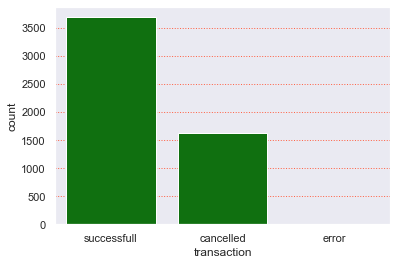

In [5]:
sns.set_style("dark", {'axes.grid':True,
                      'grid.linestyle': ':',
                      'grid.color':'tomato'
                       }) 
sns.set_context("notebook")
sns.barplot(x="transaction", y="count", color='g', data=level) ;

## Сколько успешных транзакций осуществил каждый из пользователей?

In [6]:
successfull = transaction[transaction['transaction'] == 'successfull'] \
            .groupby(['name'], as_index=False) \
            .agg({'date':'count'}) \
            .rename(columns={'date':'amount'}) \
            .sort_values('amount', ascending=False)
successfull

,name,amount
48,Svetlana_Smirnova,82
41,Olga_Smirnova,80
31,Masha_Ozerova,80
43,Svetlana_Ivanova,79
47,Svetlana_Polyanova,78
33,Masha_Polyanova,78
6,Ekaterina_Smirnova,77
22,Lolita_Ivanova,76
9,Irina_Lesnova,76
10,Irina_Ozerova,76


## Гистограмма распределения числа успешных транзакций

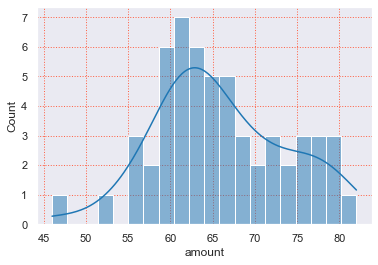

In [7]:
sns.set_context("notebook")
sns.histplot(successfull['amount'], kde=True, bins=20);

## Загрузка датасета transaction_data_updated.csv

In [8]:
transaction_update = pd.read_csv('transaction_data_updated.csv',
                                parse_dates=['date'])

f'количество загруженных строк {transaction_update.shape[0]} \
количество загруженных столбцов {transaction_update.shape[1]}'

'количество загруженных строк 5315 количество загруженных столбцов 4'

In [9]:
# проверка наличия пустых значений
transaction_update.isna().sum()

date           0
name           0
transaction    0
minute         0
dtype: int64

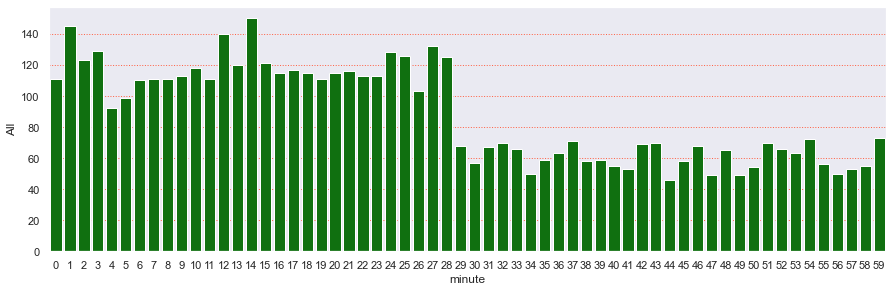

In [10]:
pv = pd.pivot_table(transaction_update,
                    index='minute',
                    columns='name',
                    values='transaction',
                    aggfunc='count',
                    margins=True,
                    fill_value=0) 


index = list(range(60))
pv_without_all = pv.iloc[index]
pv_without_all.reset_index(inplace=True)

diagram = sns.barplot(data=pv_without_all, x='minute', y='All', color="g")
diagram.figure.set_size_inches(15, 4.5);

In [18]:
# minute_true = transaction_update['date'].dt.hour * 60 + transaction_update['date'].dt.minute
# transaction_update['minute_true'] = minute_true
# minute_true.idxmax()
# transaction_update['minute_true'].idxmax()

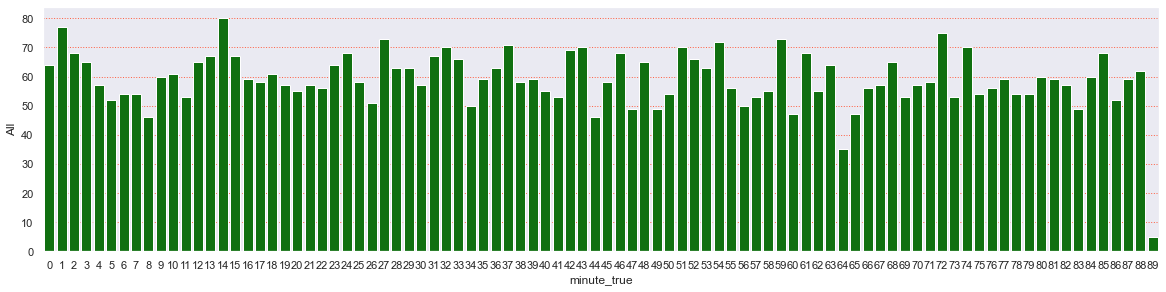

In [19]:
pv_true = pd.pivot_table(transaction_update,
                        index='minute_true',
                        columns='name',
                        values='transaction',
                        aggfunc='count',
                        margins=True,
                        fill_value=0) 
index_true = list(range(90))
pv_true_without_all = pv_true.iloc[index_true]
pv_true_without_all.reset_index(inplace=True)

diagram = sns.barplot(data=pv_true_without_all, x='minute_true', y='All', color="g")
diagram.figure.set_size_inches(20, 4.5);

In [20]:
pv_true.tail()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova,All
minute_true,,,,,,,,,,,,,,,,,,,,,
86,0,1,0,0,2,1,2,1,0,1,...,0,0,2,1,1,0,0,1,1,52
87,3,1,0,2,2,3,0,0,0,0,...,1,2,1,0,0,0,0,1,2,59
88,0,1,0,1,1,0,1,4,1,2,...,1,3,2,2,0,0,2,2,3,62
89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
All,109,83,87,110,100,97,105,99,89,106,...,100,105,87,94,85,87,88,85,92,5315


In [21]:
with pd.ExcelWriter("output.xlsx") as writer:
    level.to_excel(writer, sheet_name="level", index=False)
    successfull.to_excel(writer, sheet_name="successfull", index=False)
    pv_without_all.to_excel(writer, sheet_name="pv_without_all", index=False)
    pv_true_without_all.to_excel(writer, sheet_name="pv_true_without_all", index=False)
    